In [56]:
import numpy as np
import pandas as pd

In [57]:
df=pd.read_csv('/Users/kritisharma/100 days ml/day13/placement.csv')

In [58]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


#Steps
#1. Preprocessing+EDA+Features Selection
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
#6. Deploy the model 


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [60]:
df=df.iloc[:,1:]

In [61]:
import matplotlib.pyplot as plt

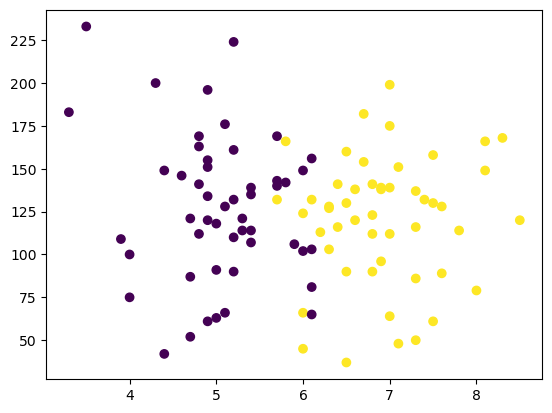

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [62]:
x= df.iloc[:,0:2]
y= df.iloc[:,-1]

In [63]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
34,4.8,163.0
39,4.6,146.0
63,6.3,128.0
40,4.9,134.0
82,6.5,37.0
...,...,...
55,7.8,114.0
74,6.7,154.0
79,6.5,90.0
22,4.9,120.0


In [19]:
y_train

34    0
39    0
63    1
40    0
82    1
     ..
55    1
74    1
79    1
22    0
18    0
Name: placement, Length: 90, dtype: int64

In [20]:
x_test

,cgpa,iq
89,4.9,151.0
90,7.3,86.0
11,6.9,138.0
64,7.0,64.0
46,5.3,114.0
65,8.1,166.0
24,4.7,121.0
36,5.7,140.0
44,7.5,61.0
48,6.6,138.0


In [21]:
y_test

89    0
90    1
11    1
64    1
46    0
65    1
24    0
36    0
44    1
48    1
Name: placement, dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler= StandardScaler()

In [34]:
x_train=scaler.fit_transform(x_train)

In [27]:
x_train

array([[-1.01243559,  0.96401862],
       [-1.18919447,  0.54151834],
       [ 0.31325602,  0.0941651 ],
       [-0.92405615,  0.24328284],
       [ 0.4900149 , -2.16745406],
       [-0.48215895, -0.25377631],
       [-2.33812719,  1.46107777],
       [-0.65891783,  0.19357693],
       [ 1.28542986,  0.19357693],
       [ 0.13649714, -1.07392392],
       [-0.65891783, -0.35318814],
       [-0.92405615,  0.76519496],
       [ 0.0481177 ,  0.61607721],
       [-1.45433279,  1.88357806],
       [-0.74729727,  0.0941651 ],
       [ 1.90408594,  0.61607721],
       [-1.01243559,  0.41725355],
       [ 0.31325602, -0.52715885],
       [ 0.0481177 , -1.44671829],
       [ 2.08084482,  1.08828341],
       [-0.92405615, -1.57098308],
       [ 0.75515322,  0.41725355],
       [-0.65891783,  0.9143127 ],
       [ 0.84353266,  0.36754763],
       [ 0.40163546,  0.41725355],
       [-1.80785055, -0.3780411 ],
       [ 1.46218874, -0.87510026],
       [-1.01243559, -0.30348223],
       [ 0.57839434,

In [35]:
x_test=scaler.transform(x_test)

In [29]:
x_test

array([[-1.34703977,  0.95988815],
       [ 0.80822386, -0.92508858],
       [ 0.44901326,  0.5828928 ],
       [ 0.53881591, -1.5630807 ],
       [-0.98782916, -0.1130986 ],
       [ 1.52664507,  1.39488278],
       [-1.52664507,  0.08989889],
       [-0.62861856,  0.64089209],
       [ 0.98782916, -1.65007963],
       [ 0.1796053 ,  0.5828928 ]])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf=LogisticRegression()

In [42]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=clf.predict(x_test)

In [44]:
y_test

89    0
90    1
11    1
64    1
46    0
65    1
24    0
36    0
44    1
48    1
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

1.0

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

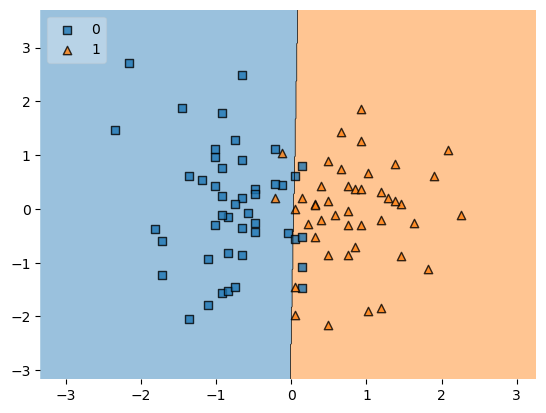

In [53]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)

In [54]:
import pickle

In [55]:
pickle.dump(clf, open('model.pkl', 'wb'))